In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [27]:
train, test = pd.read_csv("train.csv"),pd.read_csv("test.csv")
df = pd.concat([train, test], axis =1)
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,586.0,France,Female,23.0,2.0,0.00,2.0,0.0,1.0,160976.75
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,683.0,France,Female,46.0,2.0,0.00,1.0,1.0,0.0,72549.27
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,656.0,France,Female,34.0,7.0,0.00,2.0,1.0,0.0,138882.09
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,681.0,France,Male,36.0,8.0,0.00,1.0,1.0,0.0,113931.57
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,752.0,Germany,Male,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.isna()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
165030,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
165031,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
165032,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [29]:
df.duplicated().sum()

0

In [30]:
df.dropna(inplace=True, axis=1)

In [31]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [32]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
df["Surname"].nunique()

2797

In [34]:
df["Gender"].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [35]:
df["Gender"] = df["Gender"].apply(lambda x :1 if x =="Male" else 0)

In [36]:
features_to_encode = ["Geography"]

In [37]:
df.drop(["Surname","CustomerId", "id"], inplace=True, axis=1)

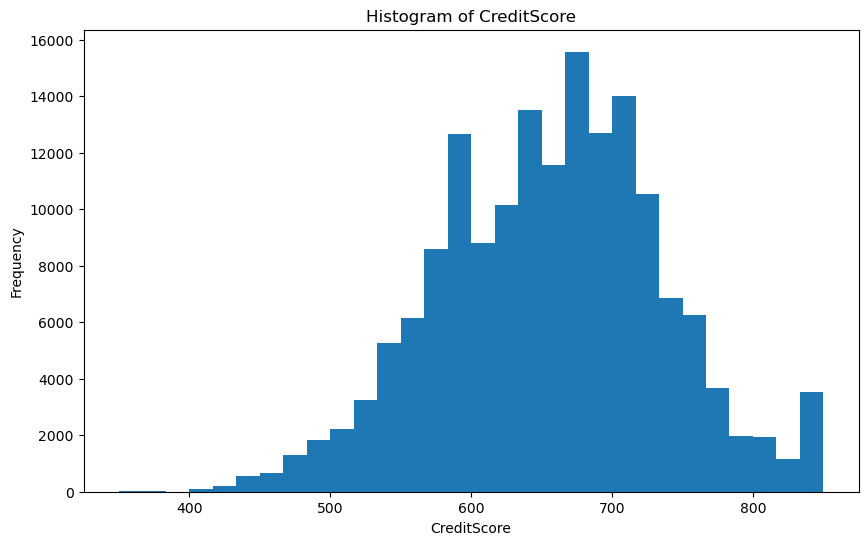

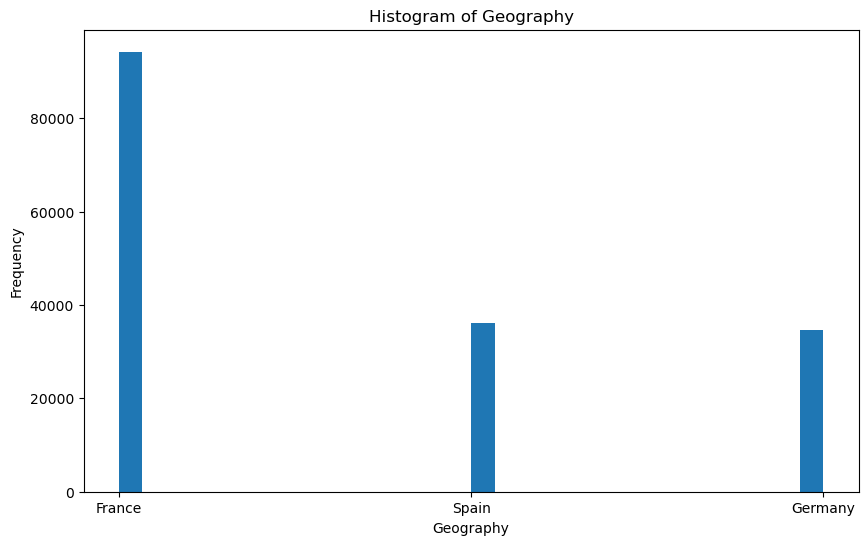

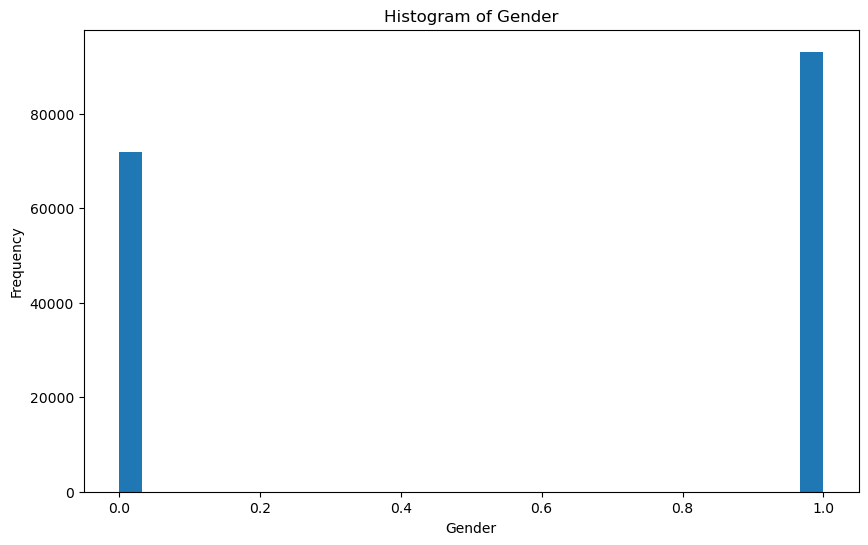

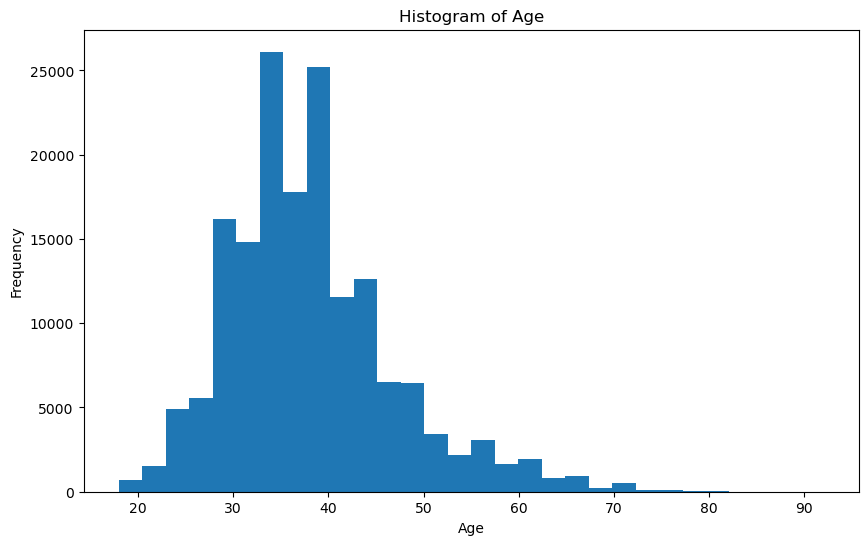

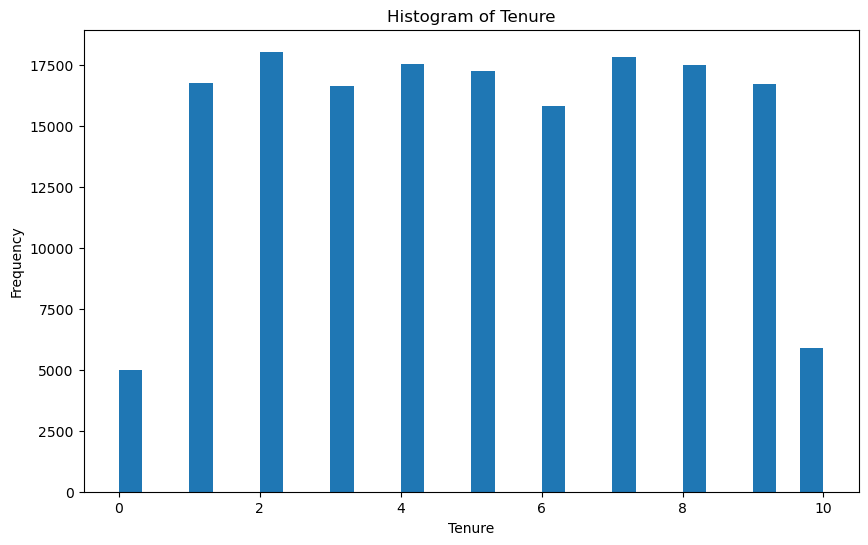

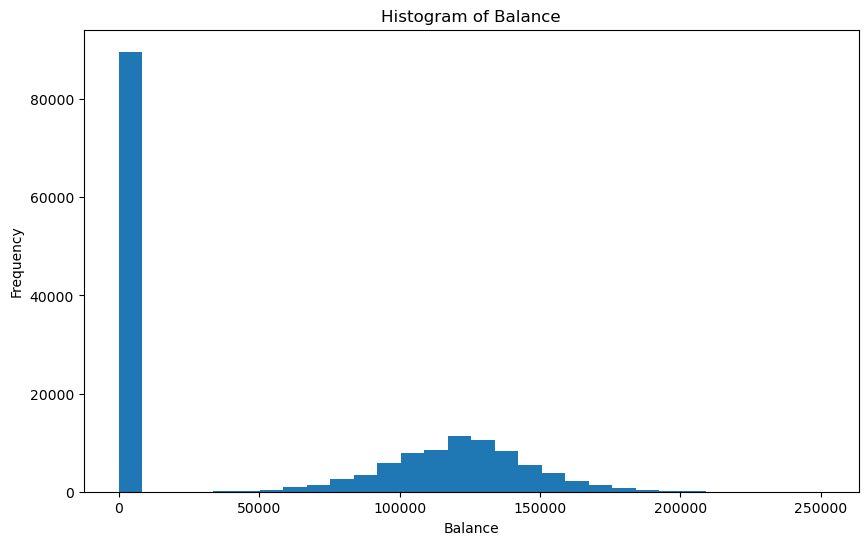

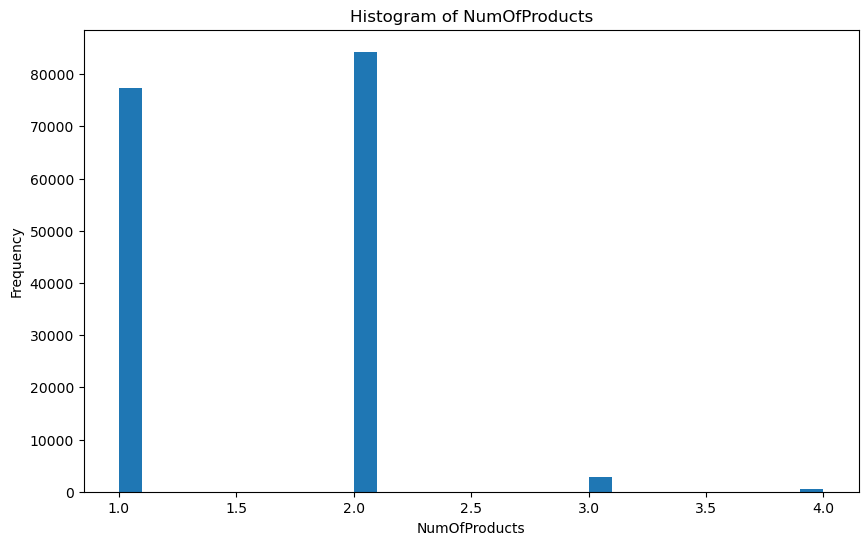

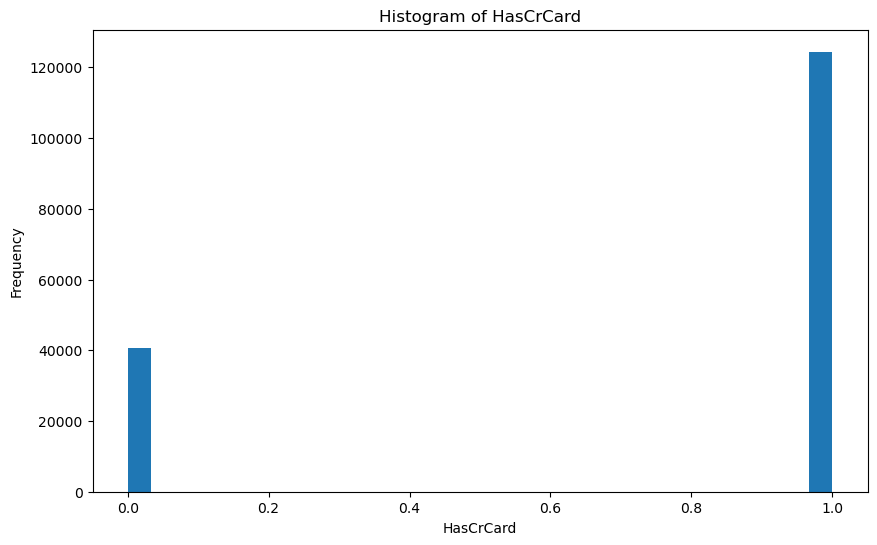

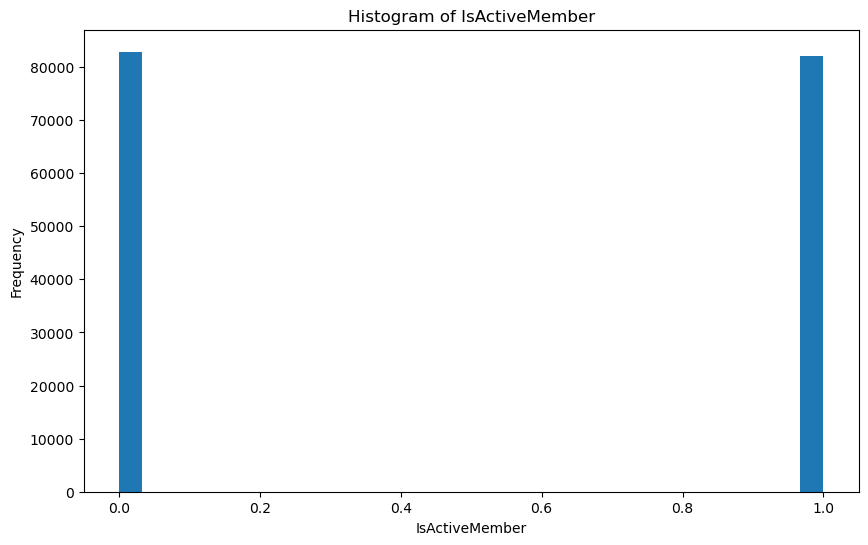

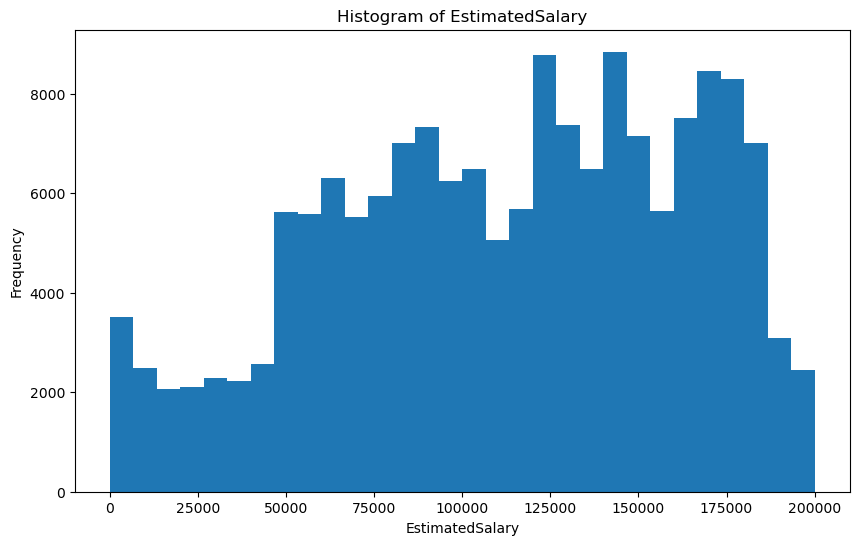

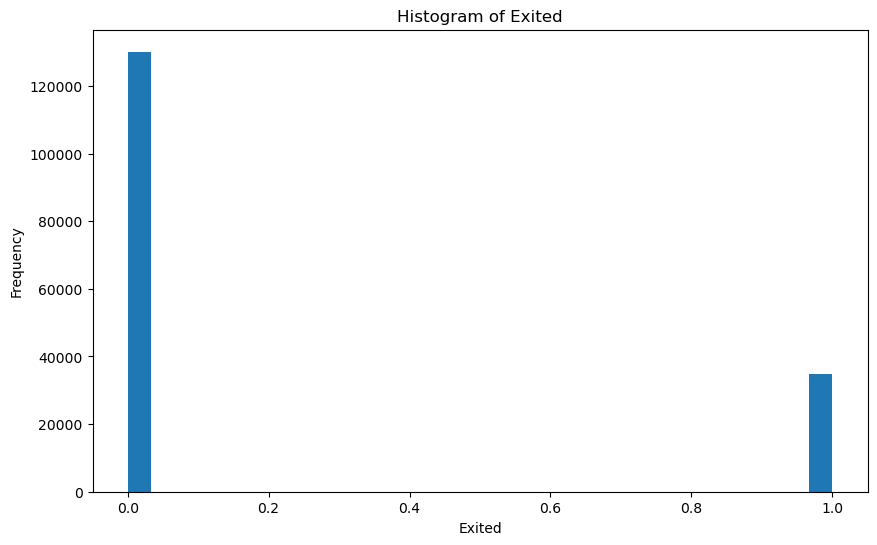

In [38]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

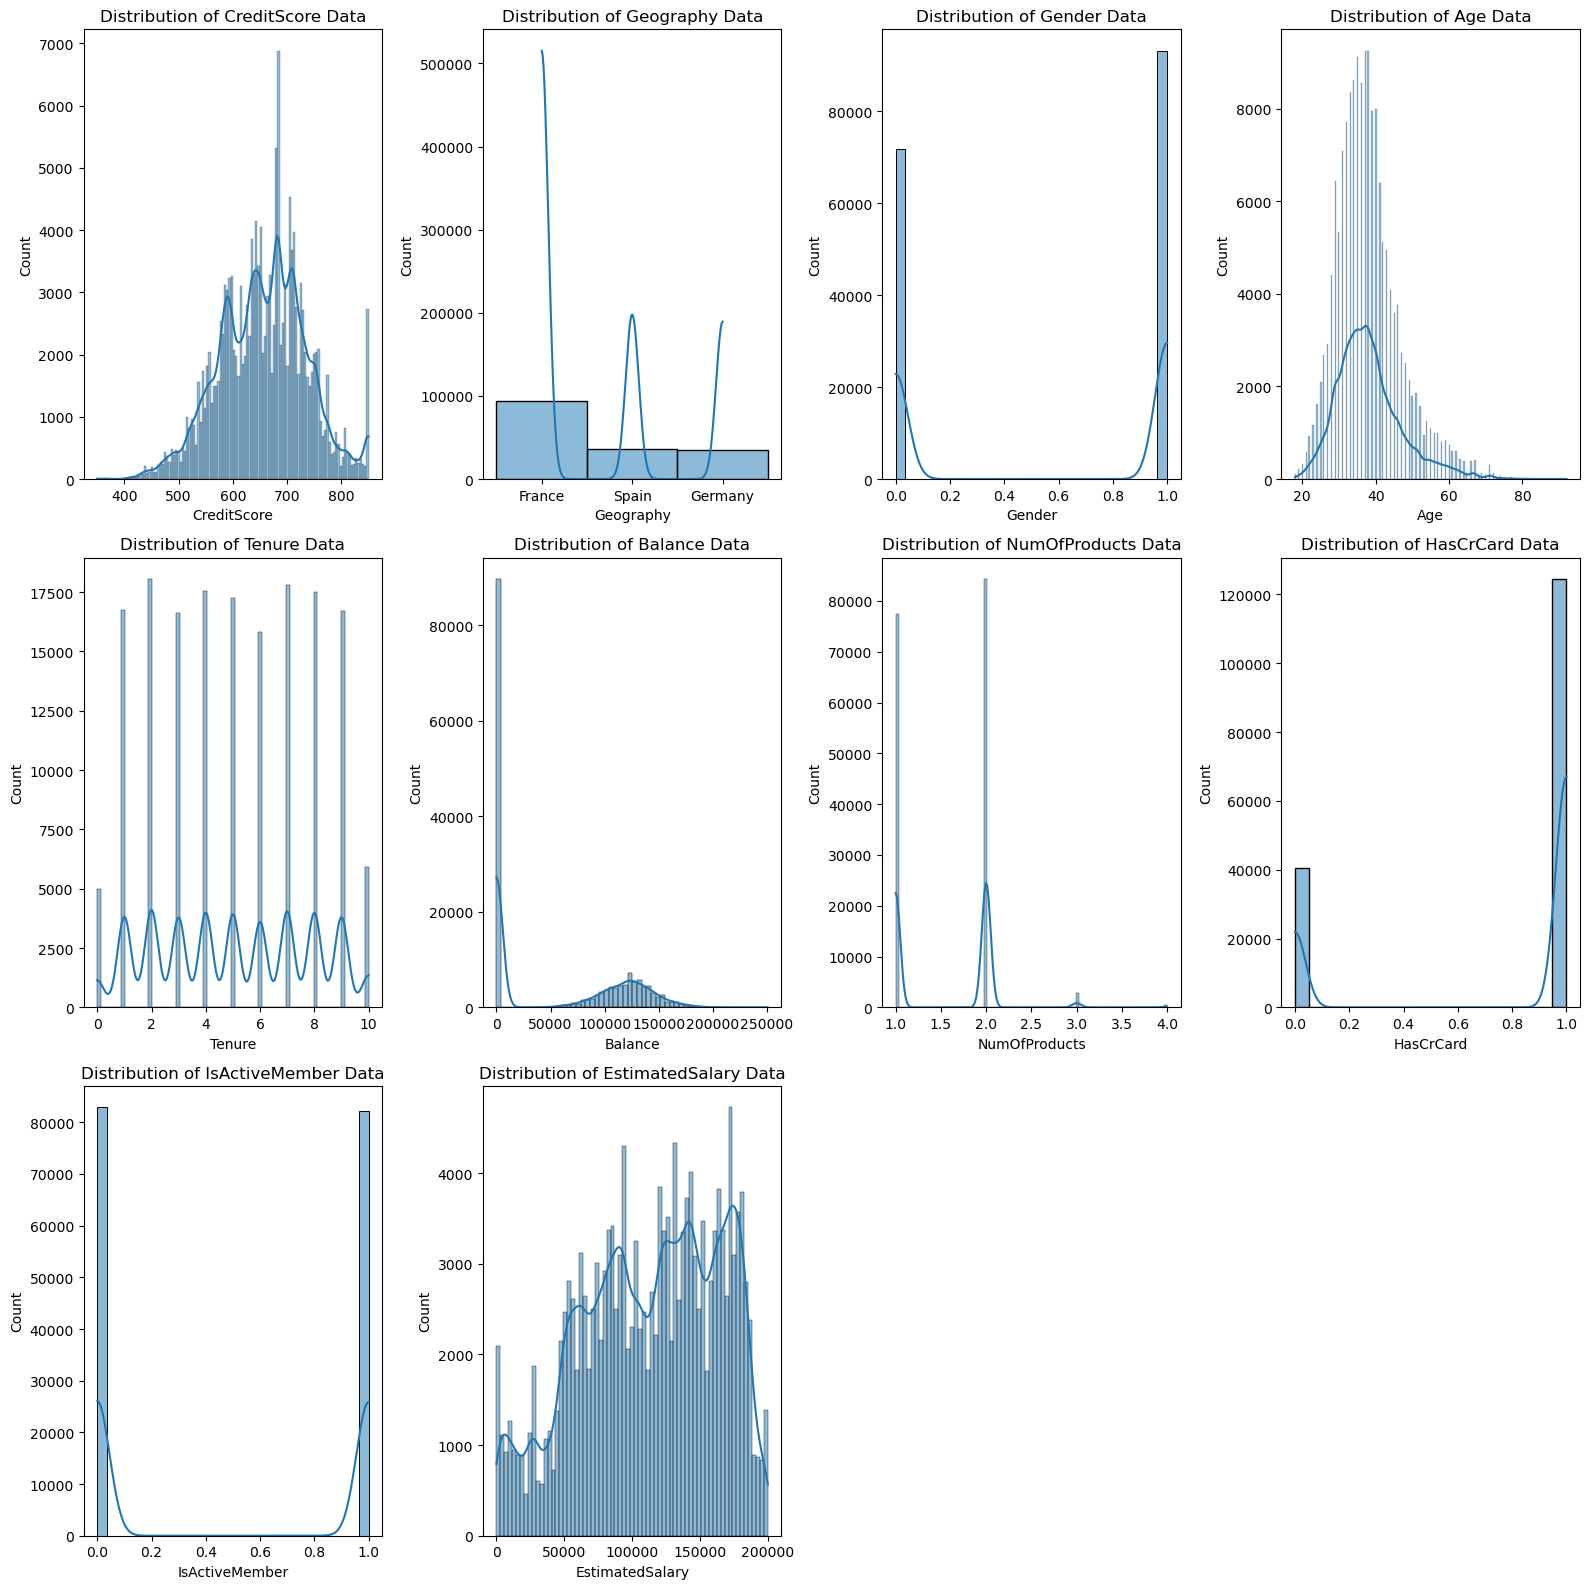

In [39]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

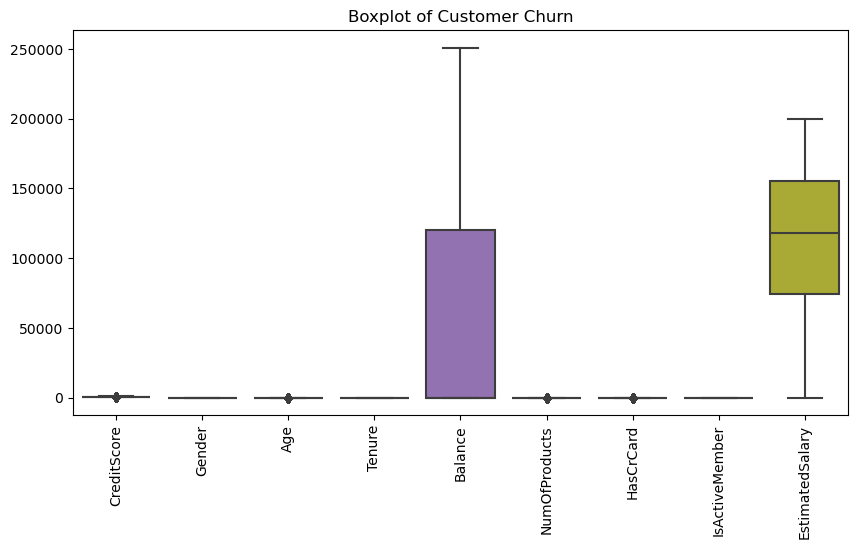

In [40]:
plt.figure(figsize = (10, 5))
sns.boxplot(df[df.columns[:-1]])
plt.title("Boxplot of Customer Churn")
plt.xticks(rotation = 90)
plt.show()

In [41]:
# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


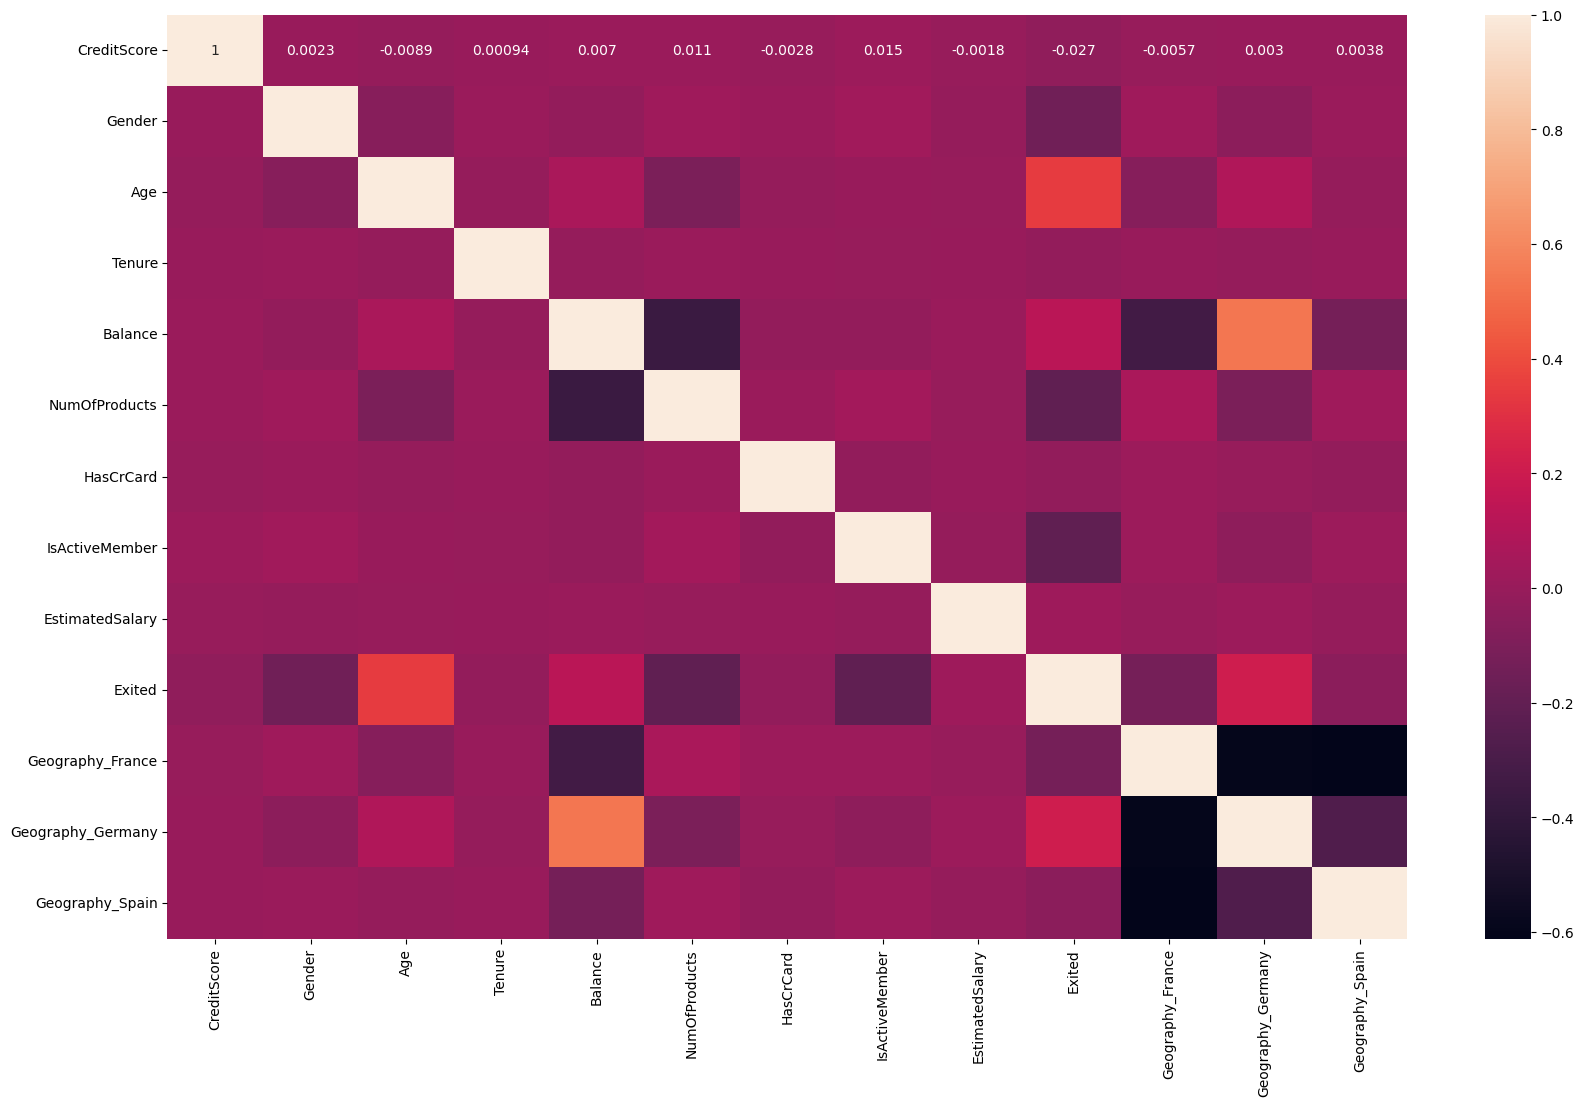

In [42]:
plt.figure(figsize=(20,12))
relations = df.corr()
sns.heatmap(data=relations,annot=True)
plt.show()

In [45]:
X, y = df.drop("Exited", axis=1), df["Exited"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [46]:
models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.8354591450298422
SVC Accuracy: 0.8630896476504983
DecisionTreeClassifier Accuracy: 0.7952252552488867
RandomForestClassifier Accuracy: 0.8580301148241282
KNeighborsClassifier Accuracy: 0.8463053291725997
GradientBoostingClassifier Accuracy: 0.8663616808555761
GaussianNB Accuracy: 0.7961947465689097
Epoch 1/100
13203/13203 [==============================] - 7s 485us/step - loss: 0.3393 - accuracy: 0.8576
Epoch 2/100
13203/13203 [==============================] - 7s 501us/step - loss: 0.3278 - accuracy: 0.8624
Epoch 3/100
13203/13203 [==============================] - 6s 487us/step - loss: 0.3264 - accuracy: 0.8635
Epoch 4/100
13203/13203 [==============================] - 7s 495us/step - loss: 0.3255 - accuracy: 0.8633
Epoch 5/100
13203/13203 [==============================] - 7s 519us/step - loss: 0.3251 - accuracy: 0.8638
Epoch 6/100
13203/13203 [==============================] - 8s 574us/step - loss: 0.3244 - accuracy: 0.8640
Epoch 7/100
13203/13203 [==

,Model,Accuracy
0,LogisticRegression,0.835459
1,SVC,0.863090
2,DecisionTreeClassifier,0.795225
3,RandomForestClassifier,0.858030
4,KNeighborsClassifier,0.846305
5,GradientBoostingClassifier,0.866362
6,GaussianNB,0.796195
7,Sequential,0.861908


In [ ]:
X, y = df.drop("Exited", axis=1), df["Exited"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [ ]:
models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models